In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
data = pd.read_csv('table.csv')

In [4]:
dmag_list = []
sep_list = []
for index, row in data.iterrows():
    mag1 = row['host_gmag']
    mag2 = row['companion_mag']
    sep = row['companion_sep']
    dmag_list.append(mag2-mag1)
    sep_list.append(sep)

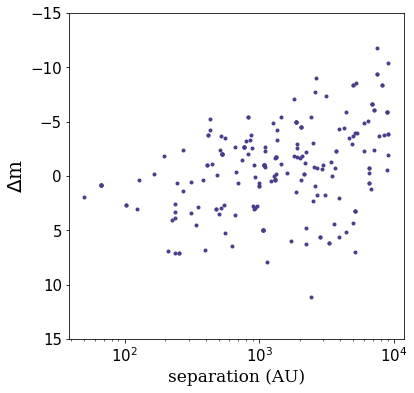

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(sep_list, dmag_list, '.',color='darkslateblue')
ax.set_xlabel('separation (AU)',fontsize=17, family='serif')
ax.set_ylabel('$\Delta$m',fontsize=20, family='serif')
ax.set_ylim(15,-15)
ax.set_xscale('log')
ax.tick_params(axis='both', labelsize=15)

In [79]:
e = []
a = []
for index, row in data.iterrows():
    e_val = row['ecc']
    a_val = row['sma']
    # require e,a value
    if math.isnan(e_val)==False and math.isnan(a_val)==False:
        # require radial velocity discovery
        if row['discovery_method']=="Radial Velocity":
            # require e error<0.2
            sigma_e1 = row['ecc_err1']
            sigma_e2 = row['ecc_err2']
            if (sigma_e1<0.2) and (sigma_e2<0.2):
                e.append(e_val)
                a.append(a_val)

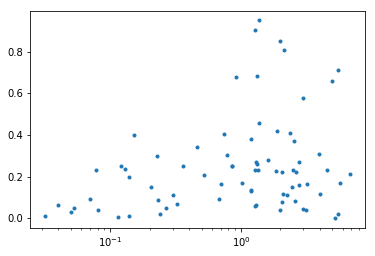

In [80]:
plt.plot(a,e,'.');plt.xscale('log')